# Obtención y preparación de los datos.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.data.shape)

(178, 13)


In [3]:
dataset_description = wine.DESCR
print(dataset_description)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [4]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [5]:
x = wine.data
print(x)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [6]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [7]:
y = wine.target
print(y)

unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


{0: 59, 1: 71, 2: 48}

In [8]:
df = pd.DataFrame(wine.data, columns = wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


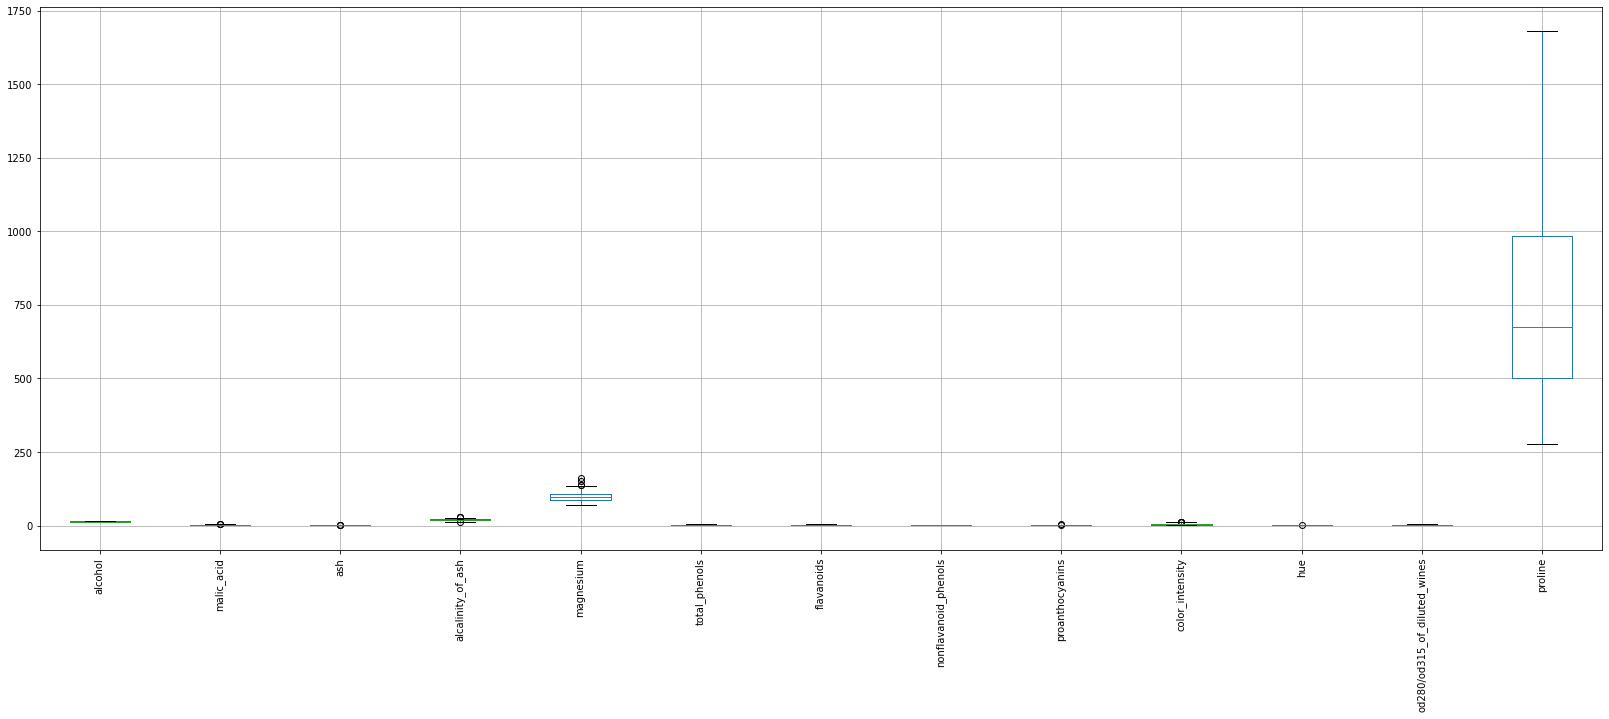

In [9]:
df.boxplot(figsize=(28,10))
plt.xticks(rotation = 90)
plt.show()

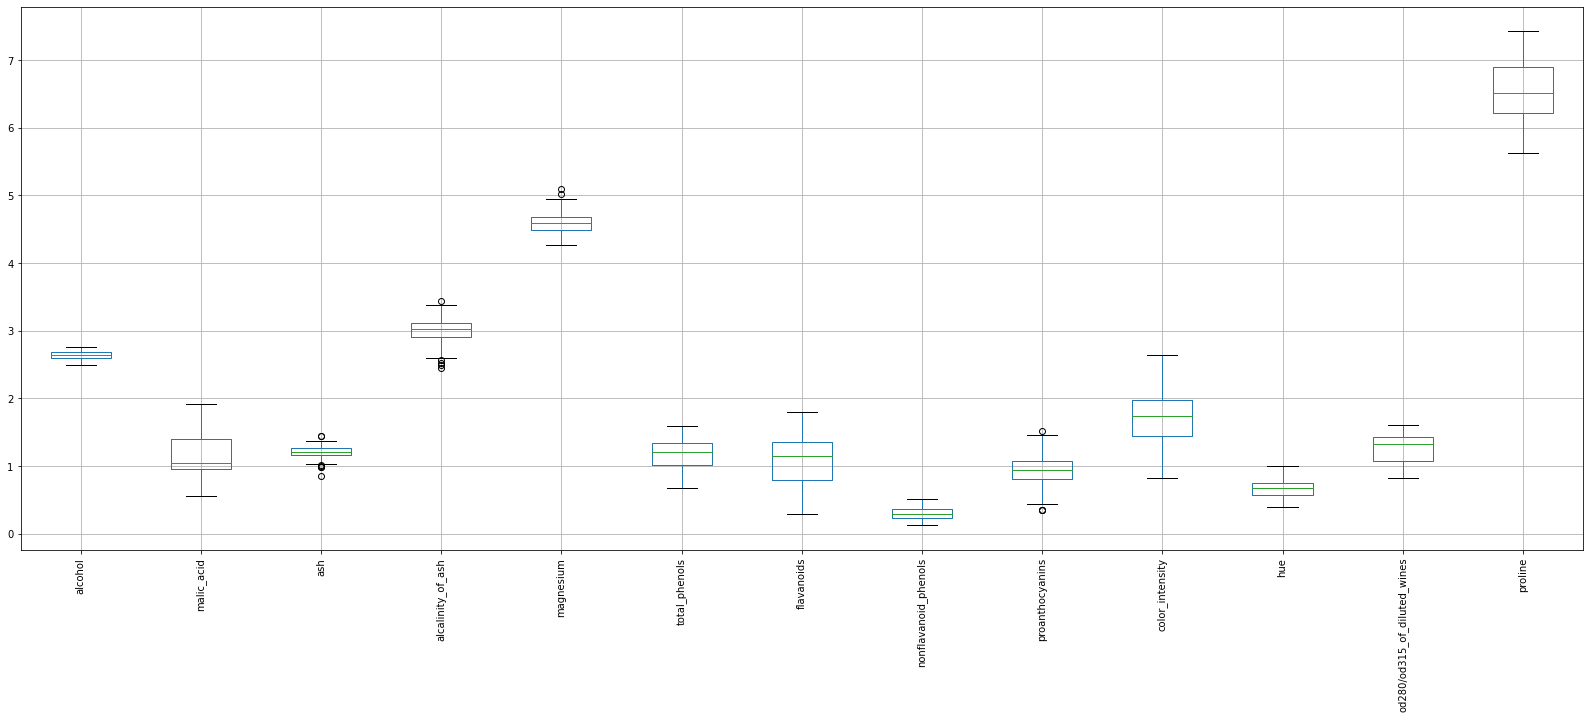

In [10]:
np.log(1+df).boxplot(figsize=(28,10))
plt.xticks(rotation = 90);

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [12]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [13]:
normalized_df = normalize(scaled_df)

In [14]:
normalized_df = pd.DataFrame(normalized_df,columns=df.columns) 

In [15]:
normalized_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.379613,-0.140548,0.058007,-0.292368,0.478426,0.202228,0.258678,-0.164873,0.306189,0.062923,0.090535,0.461931,0.253226
1,0.072771,-0.147561,-0.244647,-0.735967,0.005361,0.168017,0.216764,-0.242497,-0.160948,-0.086667,0.119975,0.328989,0.285198
2,0.059268,0.006391,0.333952,-0.080900,0.026599,0.243539,0.365922,-0.150039,0.643007,0.080985,0.095822,0.237395,0.419993
3,0.348418,-0.071435,0.100501,-0.166686,0.191747,0.513178,0.302069,-0.202243,0.212599,0.244301,-0.088064,0.243890,0.480866
4,0.110835,0.085345,0.689824,0.169399,0.480516,0.303230,0.248639,0.085008,0.150455,-0.119672,0.135752,0.168520,-0.014196


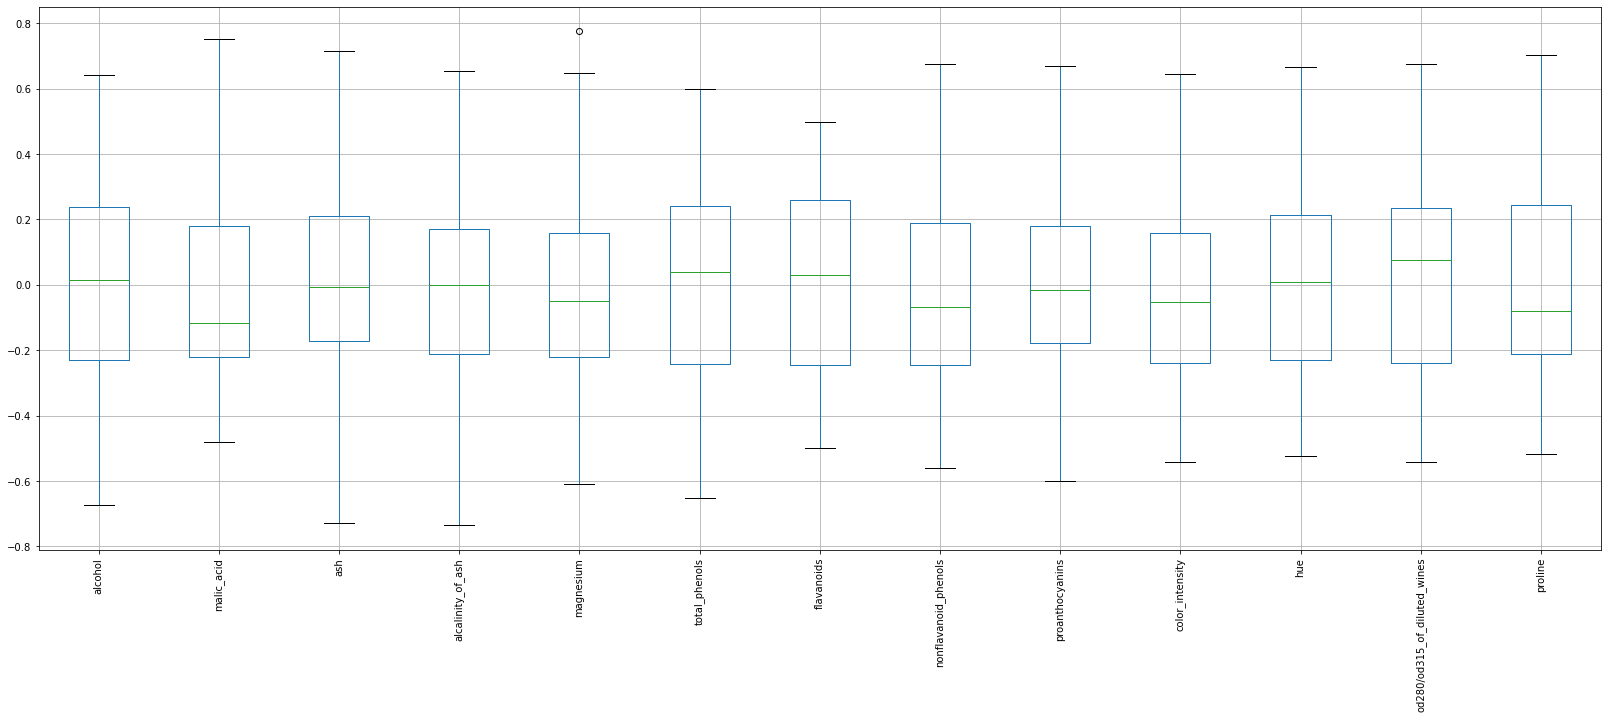

In [16]:
normalized_df.boxplot(figsize=(28,10))
plt.xticks(rotation = 90)
plt.show()

# Algoritmo K-Means.

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [17]:
from sklearn.cluster import KMeans

## Probemos con dos clústeres.

In [18]:
n_clusters = 2
km = KMeans(n_clusters=n_clusters)
km.fit(normalized_df);

### Análisis de componentes principales (Principal Component Analysis).
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components = 2) 
x_principal = pca.fit_transform(normalized_df) 
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['P1', 'P2'] 
x_principal.head()

,P1,P2
0,-0.832433,-0.318834
1,-0.639443,0.091947
2,-0.756882,-0.243317
3,-0.805447,-0.510057
4,-0.373903,-0.311604


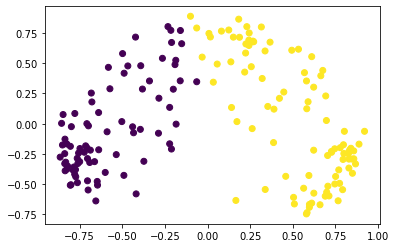

In [21]:
plt.scatter(x_principal['P1'], x_principal['P2'], c = km.predict(normalized_df))
plt.show()

## Método del Codo para determinar el número de Clústeres.

In [22]:
sum_of_squared_distances = []
for k in range(1,15):
    km = KMeans(n_clusters = k)
    km = km.fit(normalized_df)
    sum_of_squared_distances.append(km.inertia_)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


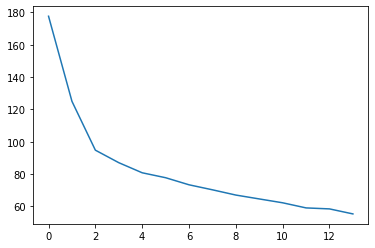

In [23]:
plt.plot(sum_of_squared_distances)
plt.show()

## Ahora probemos con tres clústeres.

In [24]:
n_clusters = 3
km = KMeans(n_clusters = n_clusters)
km.fit(normalized_df)
clusters = km.fit_predict(normalized_df)
print(clusters)
km.cluster_centers_.shape

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 1 2 1 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


(3, 13)

In [25]:
pca = PCA(n_components = 2) 
x_principal = pca.fit_transform(normalized_df) 
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['P1', 'P2'] 
x_principal.head()

,P1,P2
0,-0.832433,-0.318834
1,-0.639443,0.091947
2,-0.756882,-0.243317
3,-0.805447,-0.510057
4,-0.373903,-0.311604


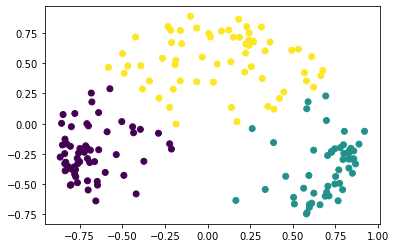

In [26]:
plt.scatter(x_principal['P1'], x_principal['P2'], 
            c = km.predict(normalized_df))
plt.show()

In [27]:
df["cluster"] = km.predict(normalized_df)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [28]:
sns.set()

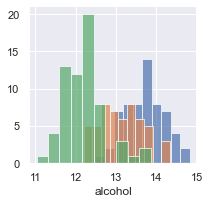

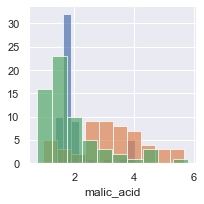

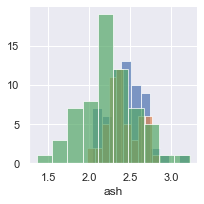

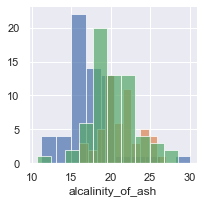

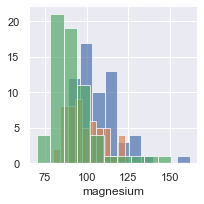

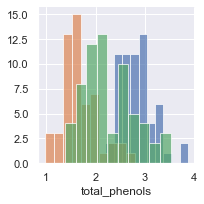

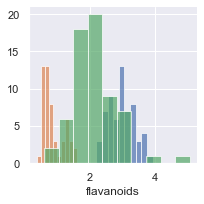

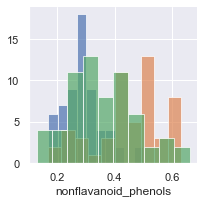

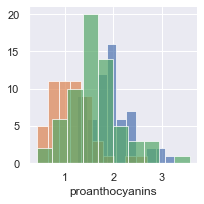

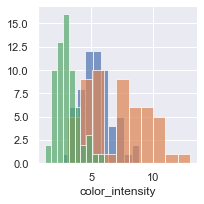

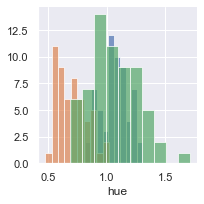

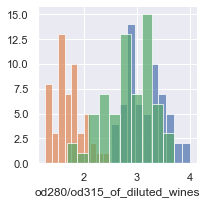

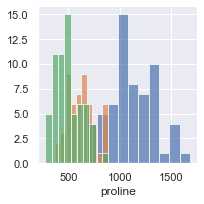

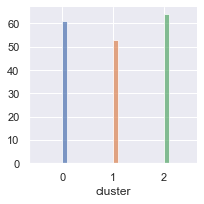

In [29]:
for columna in df:
    grid= sns.FacetGrid(df, hue="cluster")
    grid.map(plt.hist, columna, alpha = 0.7)

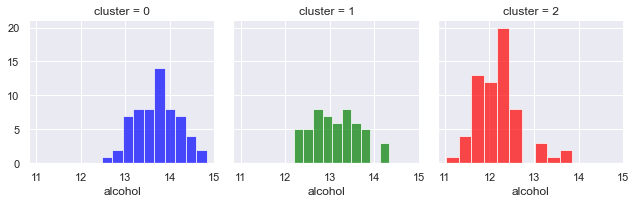

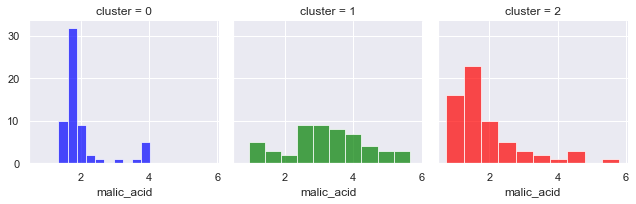

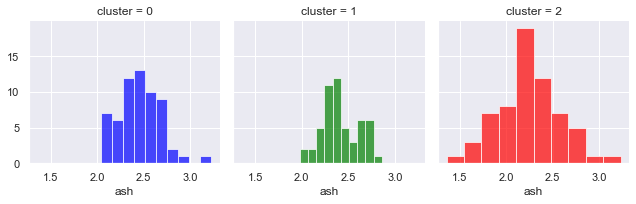

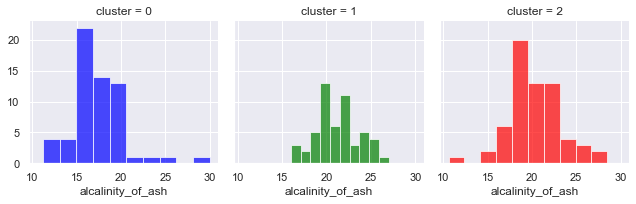

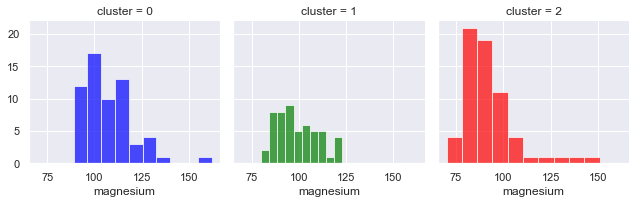

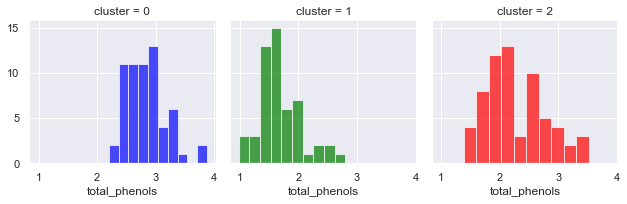

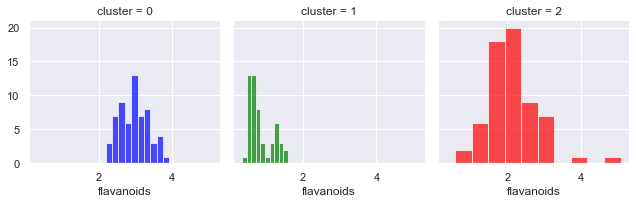

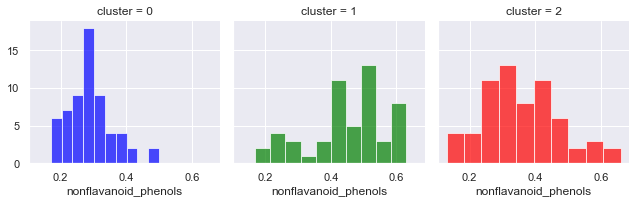

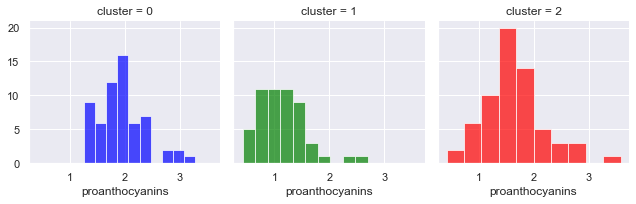

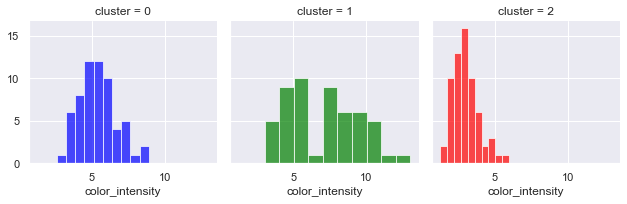

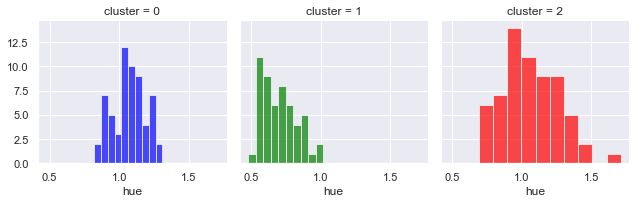

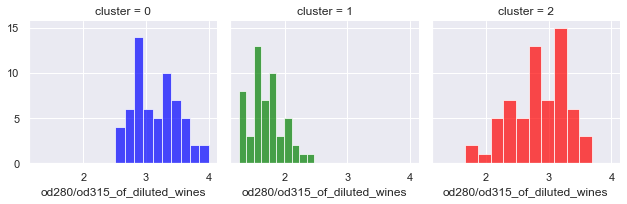

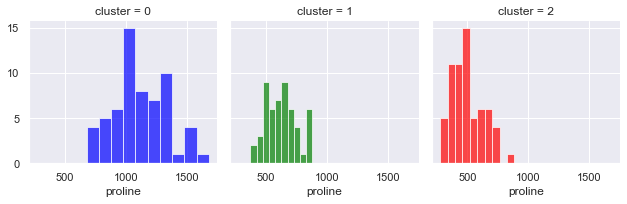

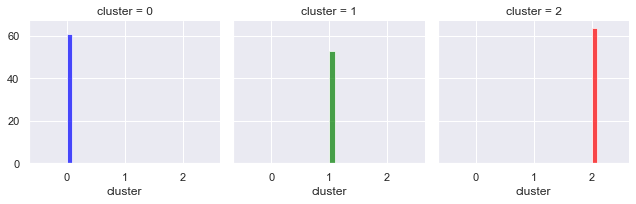

In [30]:
for columna in df:
    d = {'color': ['blue', 'green', 'red']}
    grid= sns.FacetGrid(df, col="cluster", hue_kws=d, hue="cluster")
    grid.map(plt.hist, columna, alpha = 0.7)

# Comprobemos nuestra agrupación contra la realidad

In [31]:
df.cluster

0      0
1      0
2      0
3      0
4      0
      ..
173    1
174    1
175    1
176    1
177    1
Name: cluster, Length: 178, dtype: int32

In [32]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [33]:
predicted_labels = np.zeros_like(clusters)
print(predicted_labels)
print(predicted_labels.size)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
178


In [34]:
from scipy.stats import mode

for i in range(3):
    mask = (clusters == i)
    predicted_labels[mask] = mode(wine.target[mask])[0]
    
print(predicted_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 2 1 2 1 1 0
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(wine.target, predicted_labels)

0.9606741573033708

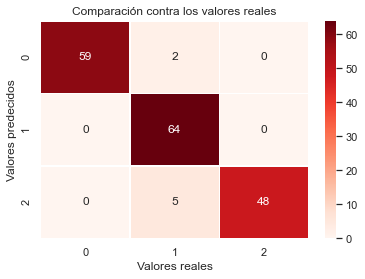

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(wine.target, predicted_labels)
sns.heatmap(cm.T, linewidth = 0.5, annot = True, cmap = 'Reds', fmt = 'g')
plt.ylabel('Valores predecidos')
plt.xlabel('Valores reales')
plt.title('Comparación contra los valores reales')
plt.show()

In [37]:
print(wine.target)

unique, counts = np.unique(wine.target, return_counts=True)
dict(zip(unique, counts))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


{0: 59, 1: 71, 2: 48}

In [38]:
print(predicted_labels)

unique, counts = np.unique(predicted_labels, return_counts=True)
dict(zip(unique, counts))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 2 1 2 1 1 0
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


{0: 61, 1: 64, 2: 53}